In [1]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read Dataset
market=pd.read_table(r"C:\Users\Animesh Kumar\Downloads\Datasets\marketing_campaign.csv")
market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Information about dataset

In [3]:
market.shape

(2240, 29)

In [4]:
market.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
market.ndim

2

In [7]:
market.size

64960

In [8]:
market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Cleaning
Finding and dealing with any duplicate and/or missing values

In [9]:
#Check number and percentage of null values
null_val= market.isnull().sum()
null_percent= (market.isnull().sum()/market.isnull().count()*100).sort_values(ascending = False)
print(pd.concat([null_val,null_percent],axis=1,keys=['Total Null', 'Percentage Null']))

                     Total Null  Percentage Null
ID                            0         0.000000
Year_Birth                    0         0.000000
Education                     0         0.000000
Marital_Status                0         0.000000
Income                       24         1.071429
Kidhome                       0         0.000000
Teenhome                      0         0.000000
Dt_Customer                   0         0.000000
Recency                       0         0.000000
MntWines                      0         0.000000
MntFruits                     0         0.000000
MntMeatProducts               0         0.000000
MntFishProducts               0         0.000000
MntSweetProducts              0         0.000000
MntGoldProds                  0         0.000000
NumDealsPurchases             0         0.000000
NumWebPurchases               0         0.000000
NumCatalogPurchases           0         0.000000
NumStorePurchases             0         0.000000
NumWebVisitsMonth   

In [10]:
#Create a copy of the dataframe
mkt=market.copy()

In [11]:
#Drop rows with null values
mkt=mkt.dropna()
mkt.shape

(2216, 29)

In [12]:
#Check for duplicate values
mkt.duplicated().sum()

0

In [13]:
mkt.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [14]:
print("Total categories in the feature Marital_Status:\n", mkt["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", mkt["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Feature Engineering

* Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
* Create a new feature "Expenditure" indicating the total amount spent by the customer in various categories over the span of two years.
* Modify "Marital_Status" to display whether a customer is single or not.
* Create a new feature "Children" to indicate total children in a household by summing the number kids and teenagers.
* Modify "Education" to sort the qualification of the customers into 3 categories: Undergraduate, Graduate and PostGraduate.
* Rename some features to facilitate understanding
* Create a new feature TotalAcceptedCmp to collate all AcceptedCmp columns into one column
* Create a new feature "Customer_For" indicating the number of days a person has been customer
* Drop some redundant features

In [15]:
#Age of Customers
mkt["Age"] = 2022-mkt["Year_Birth"]

#Sorting Marital Status into 2 categories
mkt['Marital_Status'] = mkt['Marital_Status'].replace(['Married', 'Together'],'Together')
mkt['Marital_Status'] = mkt['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

#Sorting Educational qualification into 3 categories
mkt["Education"]=mkt["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Total Expenditure
mkt["Expenditure"] = mkt["MntWines"]+ mkt["MntFruits"]+ mkt["MntMeatProducts"]+ mkt["MntFishProducts"]+ mkt["MntSweetProducts"]+ mkt["MntGoldProds"]

#Renaming for easier understanding
mkt = mkt.rename(columns = {'MntWines':'Wines','MntFruits':'Fruits',
       'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet',
       'MntGoldProds':'Gold'})

#Total Number of children for each customer
mkt['Children'] = mkt['Kidhome'] + mkt['Teenhome']

#Collating AcceptedCmp into one column
mkt['TotalAcceptedCmp'] = mkt['AcceptedCmp1'] + mkt['AcceptedCmp2'] + mkt['AcceptedCmp3'] + mkt['AcceptedCmp4'] + mkt['AcceptedCmp5']

In [16]:
#Number of days the customer has been here for
mkt['Dt_Customer'] = pd.to_datetime(mkt.Dt_Customer)

dates = []
for i in mkt["Dt_Customer"]:
    i = i.date()
    dates.append(i)

days = []
dmax = max(dates)
for i in dates:
    diff = dmax - i
    days.append(diff)
mkt["Customer_For"] = days
mkt["Customer_For"]=mkt["Customer_For"].dt.days

In [17]:
#Dropping Redundant Columns
mkt=mkt.drop(columns=['ID','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'])
mkt.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenditure,Children,TotalAcceptedCmp,Customer_For
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,1,65,1617,0,0,971
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,68,27,2,0,125
2,Graduate,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,57,776,0,0,472
3,Graduate,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,38,53,1,0,65
4,Postgraduate,Together,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,41,422,1,0,321


# Finding and removing outliers

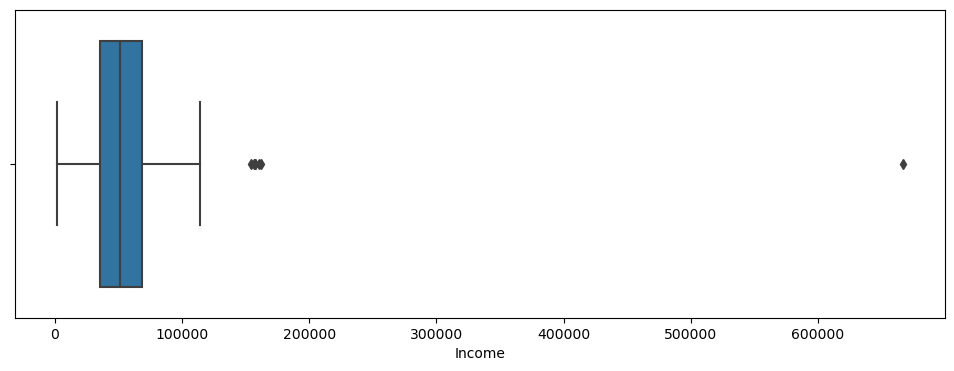

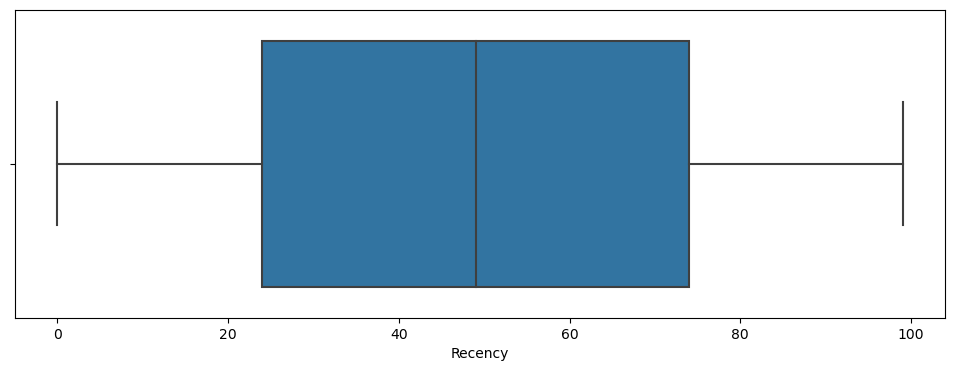

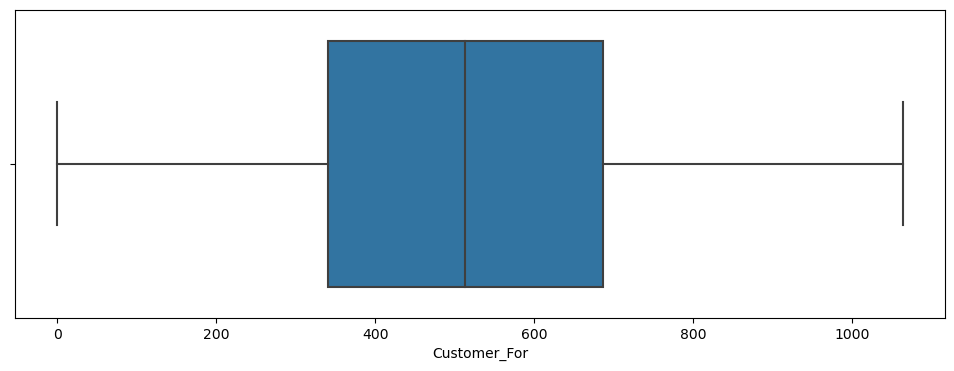

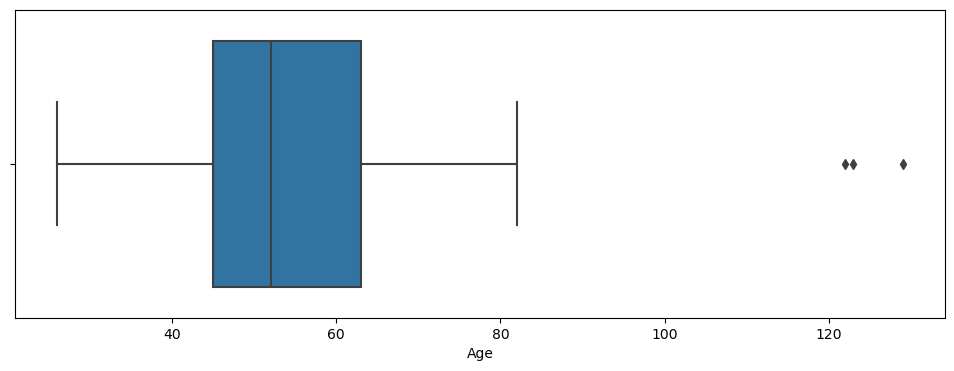

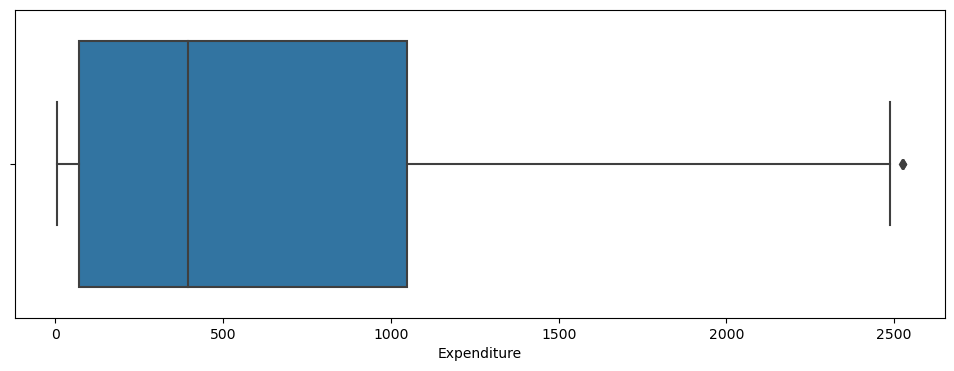

In [18]:
#Detecting Outliers
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Expenditure"]
for feature in To_Plot:
    fig = plt.figure(figsize=(12,4))
    sns.boxplot(x=mkt[feature])
    plt.show()

- We see that "Age" has a few outliers, all of which are greater than 100. This has happened because the dataset is old and the current year has been used to calculate the age.
- Also, "Income" has one outlier with income>60000.
- These outliers will be removed in the next step.

In [19]:
#Removing Outliers
mkt = mkt[(mkt["Age"]<90)]
mkt = mkt[(mkt["Income"]<600000)]

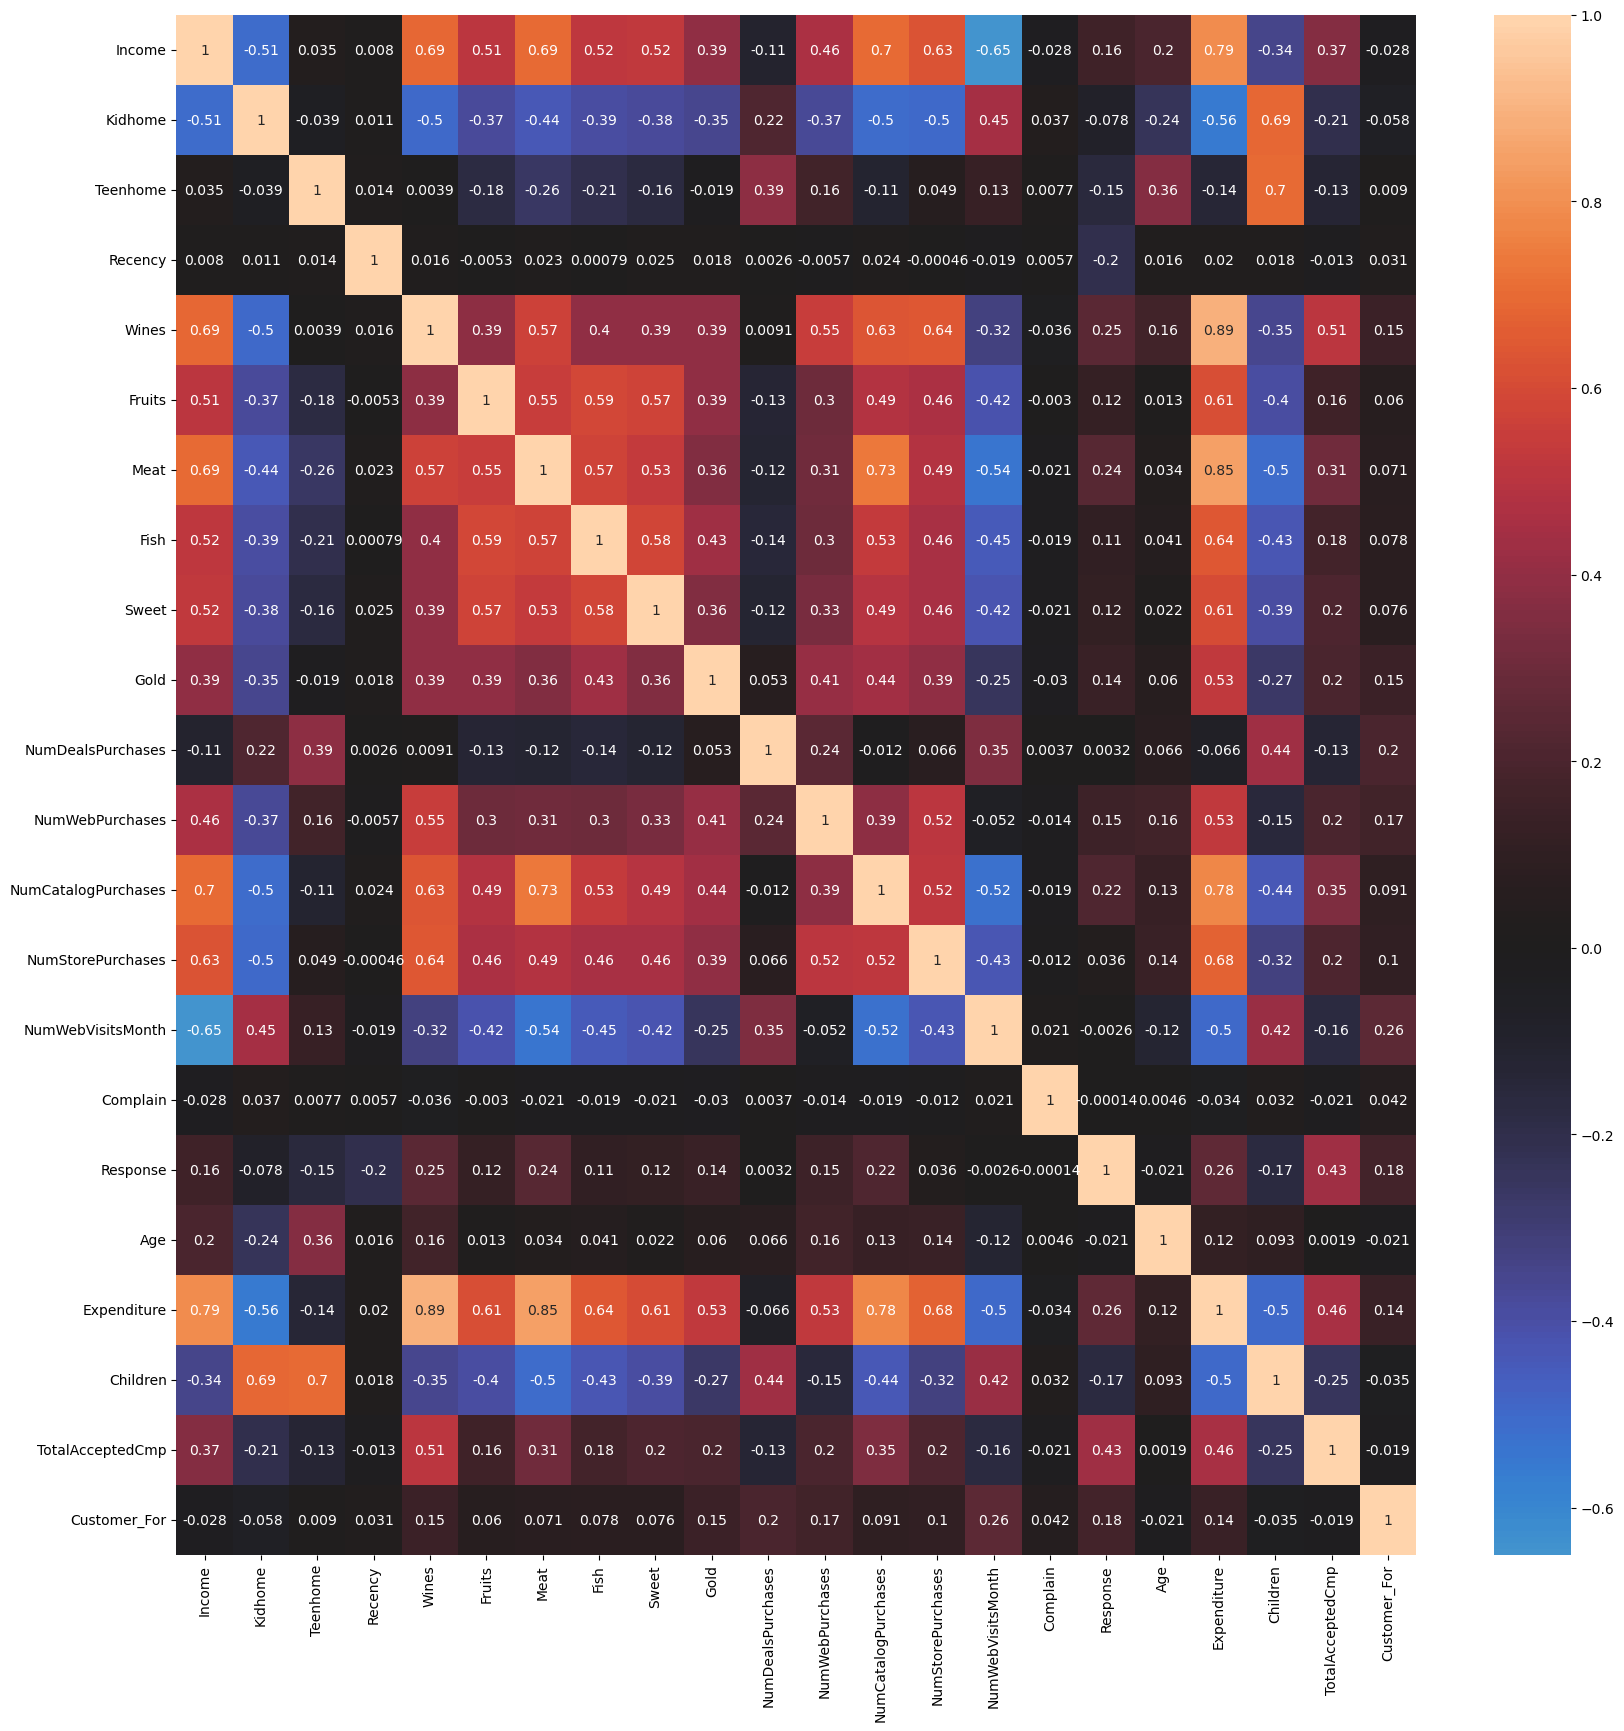

In [20]:
corrmat= mkt.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,center=0)
plt.show()

# Data Preprocessing

- One hot encoding will be used to encode the categorical features. 
- The data will be scaled using the Standard Scaler.
- Principal Component Analysis will be used to reduce the dimensions of the data to 3.

In [21]:
#Checking categorical features
cat_feature=[feature for feature in mkt.columns
    if mkt[feature].dtype==object]
cat_feature

['Education', 'Marital_Status']

In [22]:
#One hot encoding
mkt_enc=pd.get_dummies(mkt, columns=cat_feature,drop_first=False)

#Scaling
scaler = StandardScaler()
scaler.fit(mkt_enc)
mkt_scaled = pd.DataFrame(scaler.transform(mkt_enc),columns= mkt_enc.columns )

In [23]:
#Dimensionality reduction using PCA
pca = PCA(n_components=3)
pca.fit(mkt_scaled)
mkt_pca = pd.DataFrame(pca.transform(mkt_scaled), columns=(['Col1','Col2','Col3']))

# Clustering
## Elbow Method
The optimal number of clusters will be determined using the elbow method

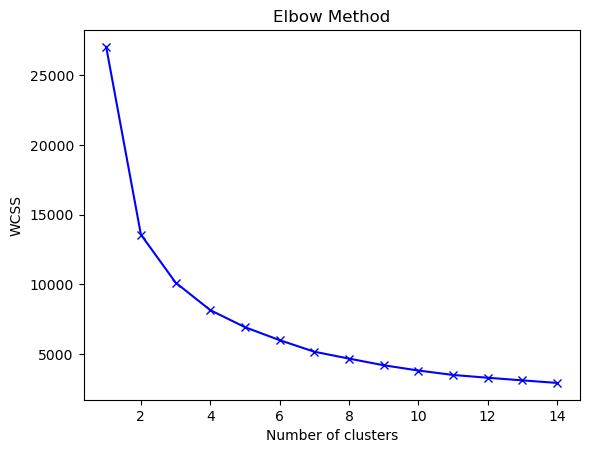

In [24]:
#Elbow Method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(mkt_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the curve, it is apparent that the optimal number of clusters is 4.

## Using K-Means to create clusters

In [25]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 50)
y_clusters = kmeans.fit_predict(mkt_pca)

## Visualizaton of the clusters

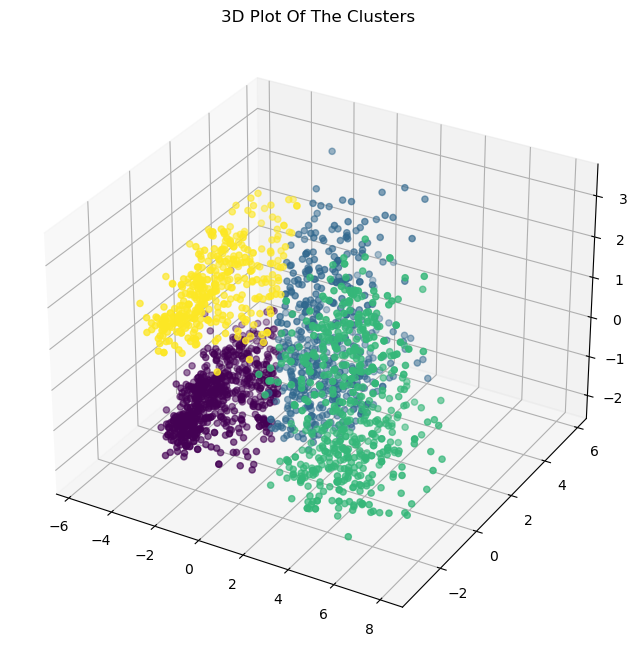

In [26]:
#3D Visualization of Clusters
x=mkt_pca["Col1"]
y=mkt_pca["Col2"]
z=mkt_pca["Col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, c=y_clusters)
ax.set_title("3D Plot Of The Clusters")
plt.show()

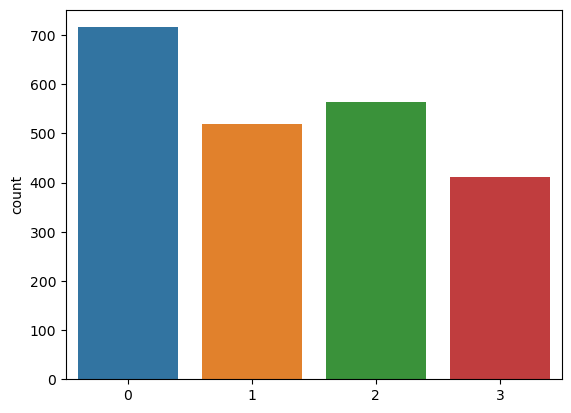

In [27]:
#Visualizing of the number of customers in each cluster
sns.countplot(x=y_clusters)
plt.show()

# Analysing the Clusters

In [28]:
#Adding the clusters to the dataset
mkt['Clusters']=y_clusters

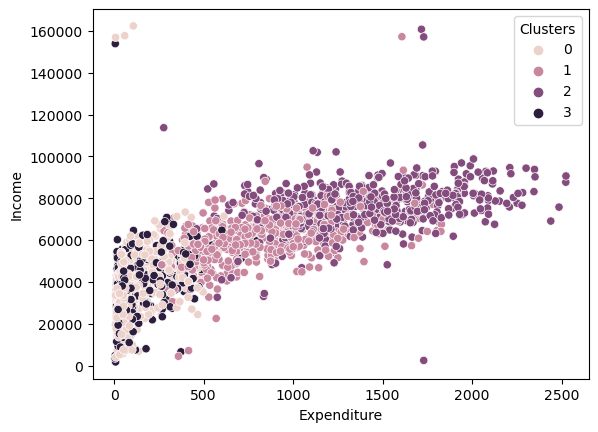

In [29]:
sns.scatterplot(data = mkt,x=mkt["Expenditure"], y=mkt["Income"],hue=mkt["Clusters"])
plt.show()

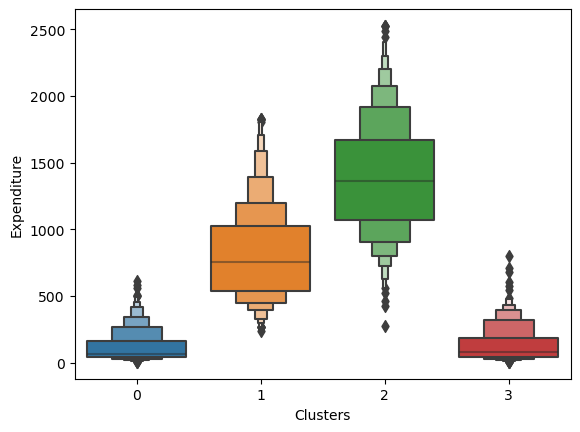

In [30]:
sns.boxenplot(x=mkt['Clusters'],y=mkt['Expenditure'])
plt.show()

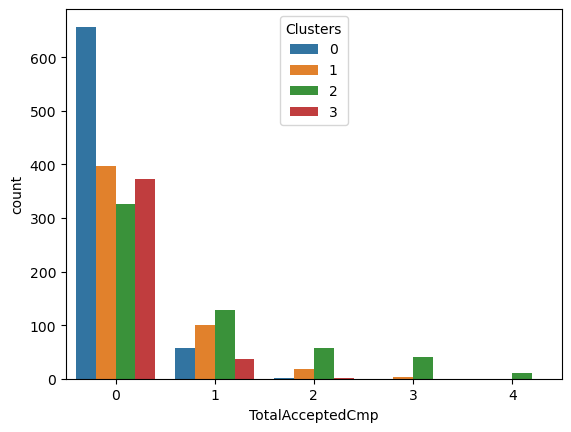

In [31]:
sns.countplot(hue=mkt['Clusters'],x=mkt['TotalAcceptedCmp'])
plt.show()

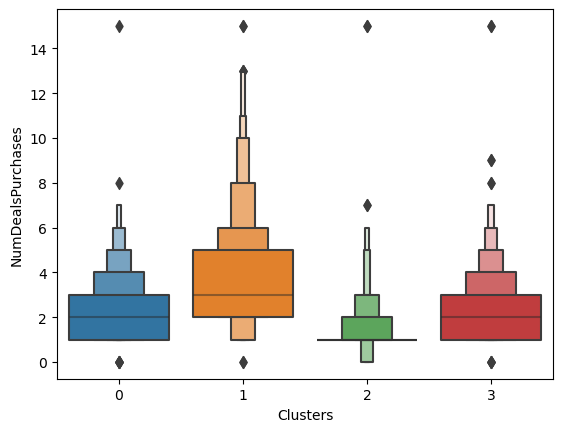

In [32]:
sns.boxenplot(x=mkt['Clusters'],y=mkt['NumDealsPurchases'])
plt.show()